# Word2Vec in NLP


## Introduction

Word2Vec is a popular technique in Natural Language Processing (NLP) for representing words as vectors in a high-dimensional space. 
This representation captures semantic relationships between words, enabling algorithms to perform tasks such as clustering, classification, and similarity measurement more effectively.

In this tutorial, we will cover:

- What is Word2Vec?
- The difference between Skip-Gram and CBOW models.
- Implementing Word2Vec using Gensim.
- Visualizing word embeddings.
- Using pre-trained Word2Vec models.


## 1. What is Word2Vec?


Word2Vec is a family of models developed by Google that maps words to vectors of real numbers. These vectors are positioned in a way 
such that words with similar meanings are close together in the vector space.

### Key Concepts:
- **Word Embeddings**: Dense vector representations of words in a continuous vector space.
- **Context Window**: The range of words considered as context for learning relationships.
- **Skip-Gram vs CBOW**:
  - **Skip-Gram**: Predicts context words given a target word.
  - **CBOW (Continuous Bag of Words)**: Predicts the target word based on context words.


In [1]:
# Install required library
!pip install gensim matplotlib scikit-learn


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.0 MB ? eta -:--:--
    --------------------------------------- 0.5/24.0 MB 453.5 kB/s eta 0:00:52
    --------------------------------------- 0.5/24.0 MB 453.5 kB/s eta 0:00:52
   - -------------------------------------- 0.8/24.0 MB 500.8 kB/s eta 0:00:47
   - -------------------------------------- 0.8/24.0 MB 500.8 kB/s eta 0:00:47
   - -------------------------------------- 1.0/24.0 MB 493.4 kB/s eta 0:00:47
   - -------------------------------------- 1.0/24.0 MB

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blis 1.0.1 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
thinc 8.3.2 requires numpy<2.1.0,>=2.0.0; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\python\python310\python.exe -m pip install --upgrade pip


## 2. Preparing the Data

In [1]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

# Download NLTK tokenizer data
nltk.download('punkt')

# Sample text corpus
corpus = [
    "Natural language processing enables machines to understand human language.",
    "Word embeddings are a breakthrough in machine learning.",
    "Word2Vec is a popular embedding technique in NLP.",
    "Applications of NLP include chatbots and language translation."
]

# Tokenizing sentences into words
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]
print("Tokenized Corpus:")
print(tokenized_corpus)


Tokenized Corpus:
[['natural', 'language', 'processing', 'enables', 'machines', 'to', 'understand', 'human', 'language', '.'], ['word', 'embeddings', 'are', 'a', 'breakthrough', 'in', 'machine', 'learning', '.'], ['word2vec', 'is', 'a', 'popular', 'embedding', 'technique', 'in', 'nlp', '.'], ['applications', 'of', 'nlp', 'include', 'chatbots', 'and', 'language', 'translation', '.']]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hassa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 3. Training a Word2Vec Model

In [2]:

# Train a Word2Vec model
model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=3, min_count=1, workers=4, sg=0)

# Save the model for later use
model.save("word2vec.model")

# Display vocabulary
vocabulary = list(model.wv.index_to_key)
print("Vocabulary:")
print(vocabulary)


Vocabulary:
['.', 'language', 'in', 'nlp', 'a', 'breakthrough', 'processing', 'enables', 'machines', 'to', 'understand', 'human', 'word', 'embeddings', 'are', 'translation', 'and', 'machine', 'learning', 'word2vec', 'is', 'popular', 'embedding', 'technique', 'applications', 'of', 'include', 'chatbots', 'natural']


## 4. Exploring Word Embeddings

In [3]:

# Access word vectors
word = "language"
vector = model.wv[word]
print(f"Vector for '{word}':")
print(vector)

# Find similar words
similar_words = model.wv.most_similar("language", topn=5)
print("Words similar to 'language':")
print(similar_words)


Vector for 'language':
[-8.6191623e-03  3.6708845e-03  5.1911166e-03  5.7488685e-03
  7.4651530e-03 -6.1638076e-03  1.1116909e-03  6.0442942e-03
 -2.8396654e-03 -6.1724852e-03 -4.0901249e-04 -8.3697289e-03
 -5.5950140e-03  7.1065873e-03  3.3500453e-03  7.2240024e-03
  6.8078688e-03  7.5258189e-03 -3.7938019e-03 -5.6186237e-04
  2.3466225e-03 -4.5159673e-03  8.3867060e-03 -9.8601831e-03
  6.7592836e-03  2.9151500e-03 -4.9382029e-03  4.3960339e-03
 -1.7381756e-03  6.7166826e-03  9.9676270e-03 -4.3679834e-03
 -5.9802708e-04 -5.6969849e-03  3.8449375e-03  2.7887858e-03
  6.8870103e-03  6.1005778e-03  9.5396983e-03  9.2706960e-03
  7.8986781e-03 -6.9869556e-03 -9.1575142e-03 -3.5317644e-04
 -3.1028739e-03  7.8951307e-03  5.9368778e-03 -1.5516413e-03
  1.5134091e-03  1.7917047e-03  7.8147808e-03 -9.5145097e-03
 -2.0952402e-04  3.4667032e-03 -9.3734468e-04  8.3871083e-03
  9.0165604e-03  6.5381266e-03 -7.1010989e-04  7.7104969e-03
 -8.5377852e-03  3.2013017e-03 -4.6393294e-03 -5.0910390e-03
 

## 5. Visualizing Word Embeddings

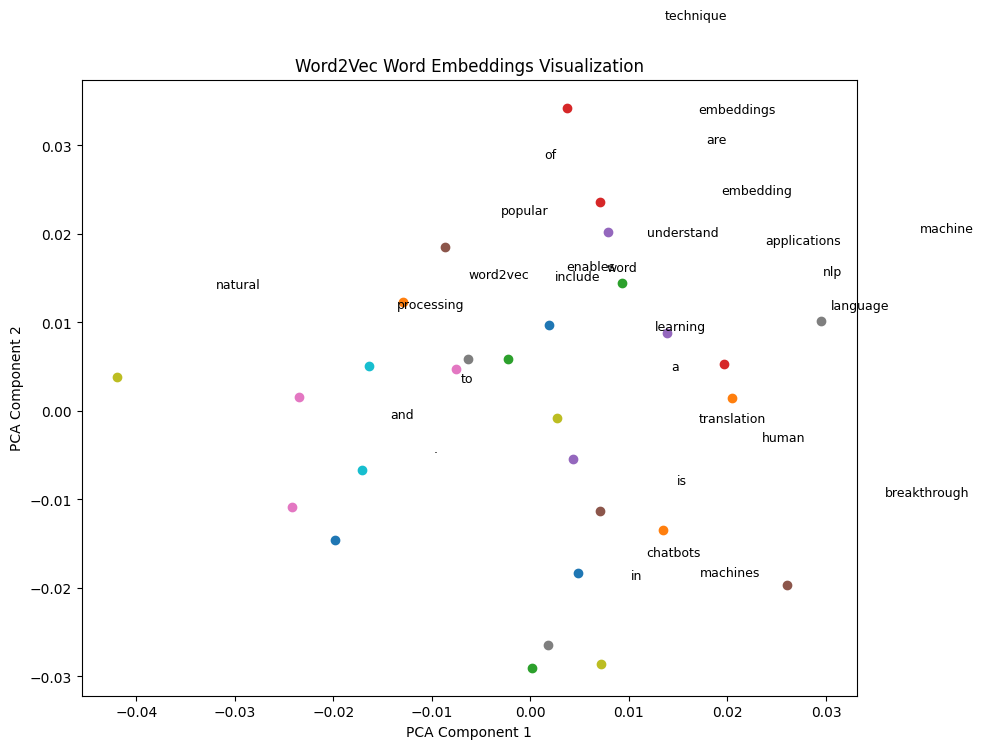

In [4]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
words = list(model.wv.index_to_key)
word_vectors = model.wv[words]
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

# Plot word vectors
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.text(reduced_vectors[i, 0] + 0.01, reduced_vectors[i, 1] + 0.01, word, fontsize=9)
plt.title("Word2Vec Word Embeddings Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


## 6. Using Pre-trained Word2Vec Models

In [7]:

from gensim.models import KeyedVectors
import gensim.downloader as api

# Load Google's pre-trained Word2Vec model (requires downloading model from Google)

model = api.load("word2vec-google-news-300")

# Example: Finding similar words with the pre-trained model

similar_words = model.most_similar("king", topn=5)
print("Words similar to 'king':")
print(similar_words)


[==================================================] 100.0% 1662.8/1662.8MB downloaded
Words similar to 'king':
[('kings', 0.7138045430183411), ('queen', 0.6510956883430481), ('monarch', 0.6413194537162781), ('crown_prince', 0.6204220056533813), ('prince', 0.6159993410110474)]


In [8]:
model['cricket']

array([-3.67187500e-01, -1.21582031e-01,  2.85156250e-01,  8.15429688e-02,
        3.19824219e-02, -3.19824219e-02,  1.34765625e-01, -2.73437500e-01,
        9.46044922e-03, -1.07421875e-01,  2.48046875e-01, -6.05468750e-01,
        5.02929688e-02,  2.98828125e-01,  9.57031250e-02,  1.39648438e-01,
       -5.41992188e-02,  2.91015625e-01,  2.85156250e-01,  1.51367188e-01,
       -2.89062500e-01, -3.46679688e-02,  1.81884766e-02, -3.92578125e-01,
        2.46093750e-01,  2.51953125e-01, -9.86328125e-02,  3.22265625e-01,
        4.49218750e-01, -1.36718750e-01, -2.34375000e-01,  4.12597656e-02,
       -2.15820312e-01,  1.69921875e-01,  2.56347656e-02,  1.50146484e-02,
       -3.75976562e-02,  6.95800781e-03,  4.00390625e-01,  2.09960938e-01,
        1.17675781e-01, -4.19921875e-02,  2.34375000e-01,  2.03125000e-01,
       -1.86523438e-01, -2.46093750e-01,  3.12500000e-01, -2.59765625e-01,
       -1.06933594e-01,  1.04003906e-01, -1.79687500e-01,  5.71289062e-02,
       -7.41577148e-03, -

In [9]:
model['crime'].shape

(300,)

In [10]:
model.most_similar('happy')

[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

In [11]:
model.similarity("hockey",'sport')

0.47289255

In [12]:
vec = model["king"] - model["man"] + model["woman"]
model.most_similar([vec])

[('king', 0.8449392318725586),
 ('queen', 0.7300517559051514),
 ('monarch', 0.645466148853302),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676352500916),
 ('prince', 0.5777117609977722),
 ('kings', 0.5613663792610168),
 ('sultan', 0.5376775860786438),
 ('Queen_Consort', 0.5344247817993164),
 ('queens', 0.5289887189865112)]

## 7. Conclusion


Word2Vec is a powerful tool for capturing semantic relationships between words. By training a Word2Vec model or using a pre-trained one, 
we can perform various NLP tasks like similarity measurement, clustering, and classification. 
Understanding how Word2Vec works and visualizing the embeddings provides deeper insights into how machines process human language.


### References
- Mikolov, T., Chen, K., Corrado, G., & Dean, J. (2013). Efficient Estimation of Word Representations in Vector Space.
- [Gensim Documentation](https://radimrehurek.com/gensim/)

In [1]:
import gensim.downloader as api

# Get the cache directory
cache_dir = api.BASE_DIR
print(f"Gensim cache directory: {cache_dir}")

Gensim cache directory: C:\Users\hassa/gensim-data
